In [1]:
import gensim

In [2]:
# Cargar los documentos del archivo reviews_data.txt utilizando 'latin-1' para evitar errores de decodificación
with open('reviews_data.txt', 'r', encoding='latin-1') as file:
    documents = file.readlines()


documents = [doc.strip().lower().split() for doc in documents]

# Entrenar Word2Vec con parámetros optimizados
model = gensim.models.Word2Vec(
    documents,
    vector_size=100,  # balance entre precisión y eficiencia
    window=5,         # 5 palabras de contexto es un valor común para captar el significado local
    min_count=2,      # Ignora las palabras que aparecen solo una vez
    workers=8         # núcleos acelera el entrenamiento
)

# Entrenar el modelo
model.train(documents, total_examples=len(documents), epochs=10)

(320936064, 439246670)

### Inciso b
b. Usando los embeddings generados, aplica la función most_similar para encontrar las 10 palabras más similares a cada una de las siguientes:
• Street
• Good
• Dog
• Mother
• Bed


In [3]:
# Encontrar las 10 palabras más similares a las dadas
words_to_check = ['street', 'good', 'dog', 'mother', 'bed']
similar_words = {}

for word in words_to_check:
    try:
        similar_words[word] = model.wv.most_similar(word, topn=10)
        print(f"Most similar words to '{word}': {similar_words[word]}")
    except KeyError:
        print(f"Word '{word}' not in vocabulary.")


Most similar words to 'street': [('street,', 0.9347642064094543), ('road', 0.8985782265663147), ('street),', 0.8488587737083435), ('road,', 0.8487274050712585), ('street)', 0.8415734767913818), ('st,', 0.8108247518539429), ('steet', 0.8063002228736877), ('st.,', 0.8040149211883545), ('street;', 0.8034685254096985), ('street).', 0.7999235391616821)]
Most similar words to 'good': [('decent', 0.8765475153923035), ('great', 0.8593388199806213), ('good,', 0.7775235176086426), ('nice', 0.7624064087867737), ('excellent', 0.7439126968383789), ('terrific', 0.7333784103393555), ('reasonable', 0.7089737057685852), ('fantastic', 0.6985287666320801), ('superb', 0.6673251986503601), ('poor', 0.6637334823608398)]
Most similar words to 'dog': [('dogs', 0.7172983288764954), ('dog,', 0.7041279077529907), ('dog.', 0.6461988091468811), ('dogs,', 0.6070606708526611), ('pet', 0.5432538986206055), ('child', 0.5387622714042664), ('aunt', 0.5363664031028748), ('companion', 0.5234019160270691), ('boyfriend,', 0

### Inciso c

In [4]:
# Extraer los embeddings de las 55 palabras
selected_words = []
for word, similar in similar_words.items():
    selected_words.append(word)  # Añadir la palabra original
    selected_words.extend([sim[0] for sim in similar])  # Añadir las 10 palabras similares

# Extraer los vectores de embeddings
embeddings = []
for word in selected_words:
    embedding = model.wv[word]
    embeddings.append(embedding)
    print(f"Word: {word}, Embedding: {embedding}")


Word: street, Embedding: [-0.55205333 -2.3271866  -1.4346802   1.274791   -3.6708364  -0.7015717
  0.820916    0.69351435 -4.490617    0.6371163   2.3052661  -2.3678606
 -0.04769546 -0.5928049  -5.276894   -4.601995   -0.12289087  2.7130888
 -3.1892736  -2.3491175  -2.8642454  -1.6232662  -1.4056944   0.29838294
  0.57479906 -1.3434145   1.4332882   5.8123856  -1.4308863  -0.30042273
 -0.5586137   2.052231   -1.0244212  -1.7236809   2.3154173  -6.155366
  4.832606   -1.5698538   0.08156952 -1.8115239  -1.1375749   1.8788471
 -1.7352521  -3.1813495  -3.789294    6.82811    -2.1797788   0.29687893
  3.4318764   4.040547    0.67440856 -2.1004994  -5.3269405   1.1739624
 -4.4165416  -1.4717818  -1.5900195  -1.1453156   2.9217298   0.8791563
  2.1833808   2.0144672   4.285887   -8.988118   -4.8750734   1.5917151
  0.7576793  -3.0613391  -2.358433   -2.0480459  -0.7379482  -2.0954275
 -2.1076527  -0.08343484  2.017144    0.7946911   4.033488    1.6825143
  1.0733453   1.0971509  -0.6321636  

### Inciso d

In [5]:
from sklearn.decomposition import PCA

# Aplicar PCA para reducir los embeddings a 2 componentes principales
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(embeddings)


### Inciso e

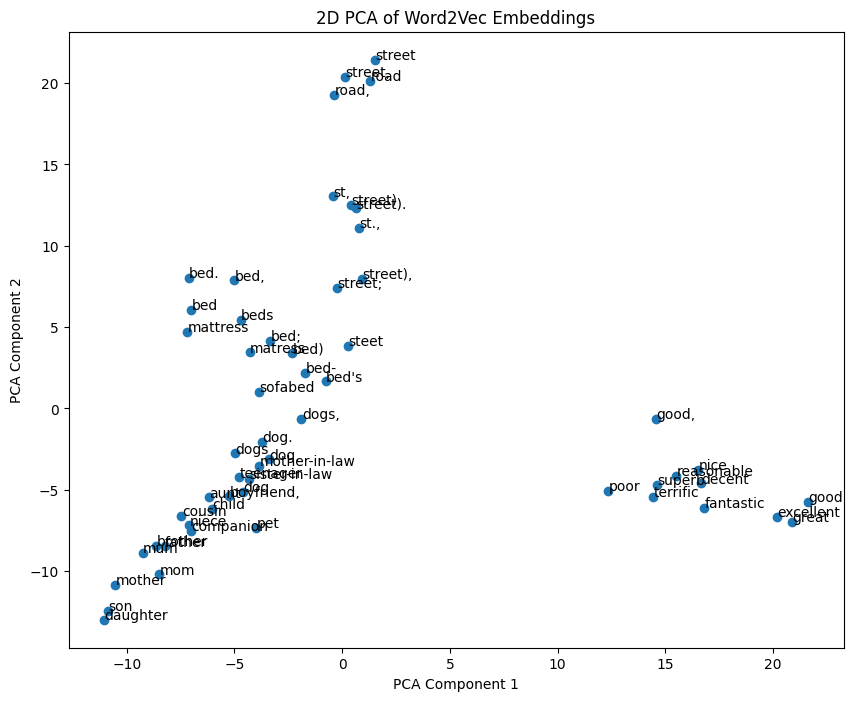

In [6]:
import matplotlib.pyplot as plt

# Crear un scatter plot con los 2 componentes principales
plt.figure(figsize=(10, 8))
plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1])

# Añadir etiquetas a los puntos
for i, word in enumerate(selected_words):
    plt.text(reduced_embeddings[i, 0] + 0.02, reduced_embeddings[i, 1] + 0.02, word)

plt.title("2D PCA of Word2Vec Embeddings")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()


In [7]:
model.wv.most_similar('machine', topn= 3)

[('machine,', 0.7788529992103577),
 ('machine.', 0.7511144876480103),
 ('machine).', 0.7323452234268188)]